# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

df = pd.read_csv('/workspaces/ds-fall-2025-fri-0630/Week-03-EDA-and-Dashboards/data/cars.csv')
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [4]:
df.shape

(11914, 15)

# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [5]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [6]:
# 1. Print the number of duplicate rows we have in our dataframe.
duplicates = df[df.duplicated()]
print(f'Number of duplicate rows: {len(duplicates)}')

Number of duplicate rows: 720


In [7]:
#  2. Modify our df to have all duplicate rows removed. 

df.drop_duplicates(inplace=True)
print(df.shape)

(11194, 15)


In [8]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
sanity_duplicates_check= df[df.duplicated()]
print(f'Number of duplicate rows: {len(sanity_duplicates_check)}')

Number of duplicate rows: 0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [9]:
# * Which column has the most null values and how many null values does it have?
null_counts = df.isnull().sum()
most_null_column = null_counts.idxmax()
most_null_count = null_counts.max()
print(f'Column with most null values: {most_null_column} ({most_null_count} null values)')


Column with most null values: Engine HP (69 null values)


In [10]:
# * Print how long our dataframe is.
# The length and weidth of the dataframe
df.shape


(11194, 15)

In [11]:
# * Remove any row that has a null value in it. 
null_rows = df[df.isnull().any(axis=1)]

print(f'Number of rows with null values: {len(null_rows)}')
df.dropna(inplace=True)

df.head(5)



Number of rows with null values: 102


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [12]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
sanity_check_null_rows = df[df.isnull().any(axis=1)]
print(f'Number of rows with null values: {len(sanity_check_null_rows)}')
print(df.shape)

Number of rows with null values: 0
(11092, 15)


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

{'Chevrolet': 1075, 'Ford': 811, 'Toyota': 713, 'Volkswagen': 564, 'Nissan': 541, 'Dodge': 528, 'GMC': 482, 'Honda': 431, 'Cadillac': 396, 'Mazda': 392, 'Mercedes-Benz': 340, 'Suzuki': 339, 'Infiniti': 328, 'BMW': 324, 'Audi': 321, 'Volvo': 266, 'Hyundai': 259, 'Acura': 246, 'Subaru': 239, 'Kia': 224, 'Mitsubishi': 205, 'Lexus': 202, 'Buick': 190, 'Chrysler': 187, 'Pontiac': 181, 'Lincoln': 152, 'Land Rover': 139, 'Porsche': 136, 'Oldsmobile': 132, 'Saab': 109, 'Aston Martin': 91, 'Bentley': 74, 'Plymouth': 71, 'Ferrari': 68, 'Scion': 60, 'FIAT': 59, 'Maserati': 55, 'Lamborghini': 52, 'Rolls-Royce': 31, 'Lotus': 28, 'HUMMER': 17, 'Maybach': 16, 'Alfa Romeo': 5, 'McLaren': 5, 'Genesis': 3, 'Bugatti': 3, 'Spyker': 2}


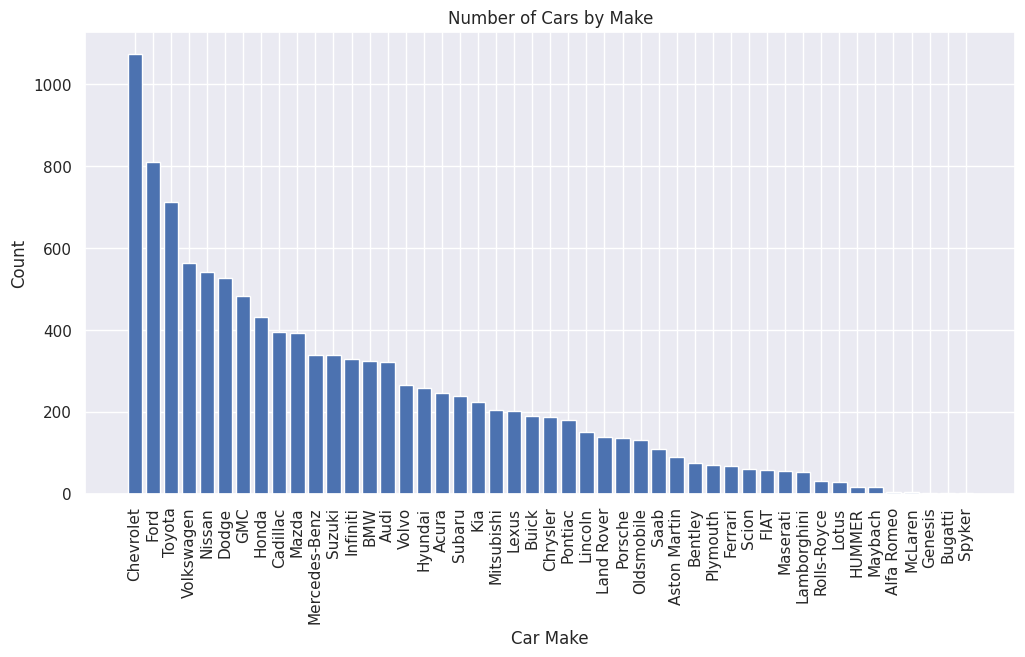

In [13]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

dict = df['Make'].value_counts().to_dict()
print(dict)

plt.figure(figsize=(12,6))
plt.bar(dict.keys(), dict.values())
plt.xticks(rotation=90)
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.title('Number of Cars by Make')
plt.show()


# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

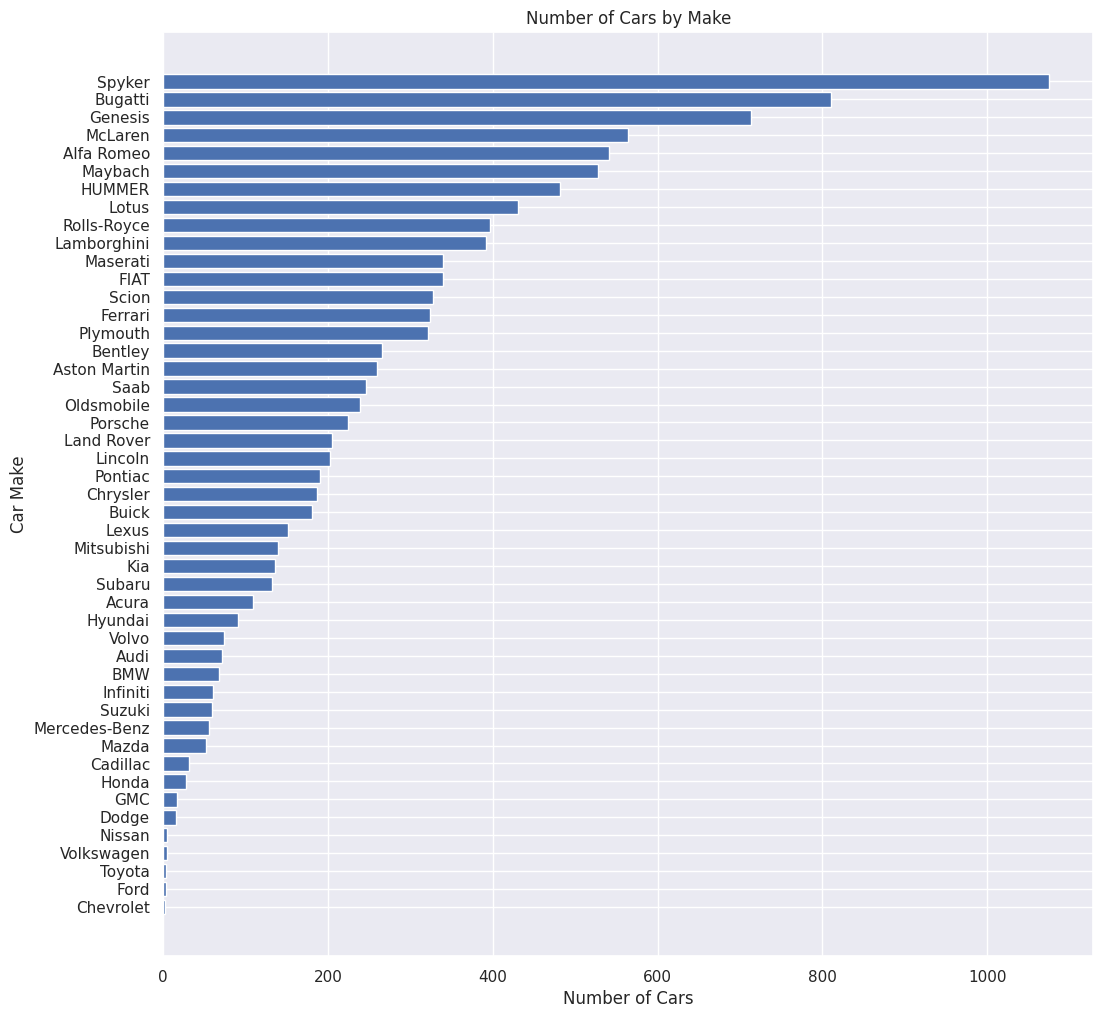

In [14]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.

plt.figure(figsize=(12,12))

plt.barh(list(dict.keys()), sorted(list(dict.values()), reverse=False))

plt.xlabel('Number of Cars')
plt.ylabel('Car Make')
plt.title('Number of Cars by Make')
plt.show()


# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.
* you're going to have to do a `groupby` for this one for sure. 
* What's noticeable about it and what do you think the error is...


{1990: 2032.2727272727273, 1991: 2120.1960784313724, 1992: 2108.3464566929133, 1993: 2211.496855345912, 1994: 2349.328125, 1995: 2647.206896551724, 1996: 2566.5652173913045, 1997: 3164.644578313253, 1998: 3036.151724137931, 1999: 3153.8508771929824, 2000: 3197.104347826087, 2001: 41500.666666666664, 2002: 33744.156097560975, 2003: 39774.06302521008, 2004: 36333.30603448276, 2005: 37029.95169082125, 2006: 32074.850515463917, 2007: 35278.40419161677, 2008: 56753.83850931677, 2009: 50876.83707865168, 2010: 52418.782608695656, 2011: 58060.14695340502, 2012: 61993.874285714286, 2013: 50770.798136645964, 2014: 65710.96139705883, 2015: 47506.75024437928, 2016: 47799.91609756098, 2017: 42224.90280373832}


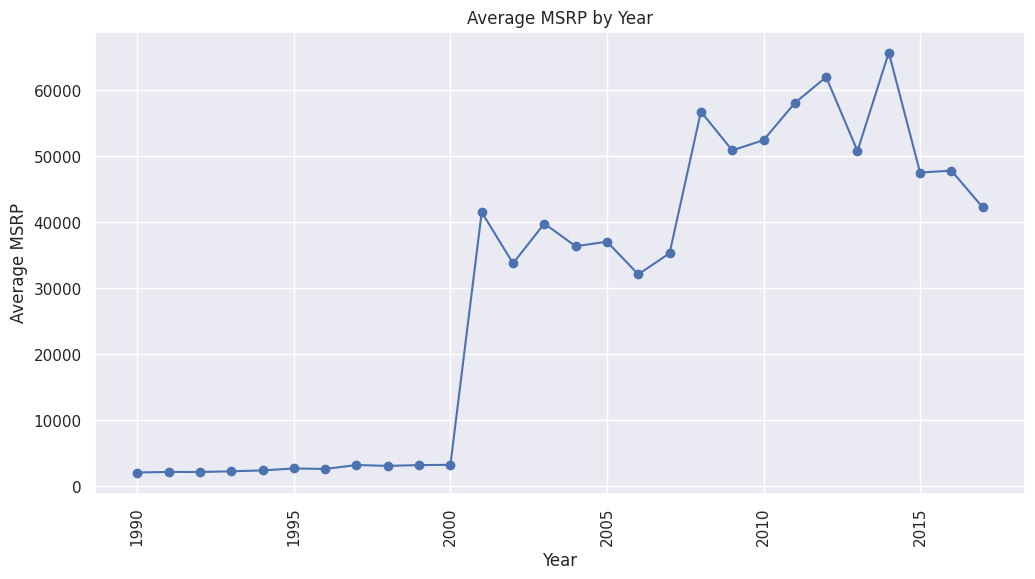

In [15]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
yearly_avg_msrp = df.groupby('Year')['MSRP'].mean().to_dict()
print(yearly_avg_msrp)
plt.figure(figsize=(12,6))
plt.plot(list(yearly_avg_msrp.keys()), list(yearly_avg_msrp.values()), marker='o')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Average MSRP')
plt.title('Average MSRP by Year')
plt.show()




# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [16]:
# Make a column where is 10 when year is less than 2000, else 1.
df['adjusted_price'] = np.where(df['Year'] <= 2000, df['MSRP']*10, df['MSRP']*1) 
# Multiply the MSRP by the price adjuster.






# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

{1990: 20322.727272727272, 1991: 21201.960784313724, 1992: 21083.464566929135, 1993: 22114.96855345912, 1994: 23493.28125, 1995: 26472.068965517243, 1996: 25665.652173913044, 1997: 31646.44578313253, 1998: 30361.51724137931, 1999: 31538.508771929824, 2000: 31971.043478260868, 2001: 41500.666666666664, 2002: 33744.156097560975, 2003: 39774.06302521008, 2004: 36333.30603448276, 2005: 37029.95169082125, 2006: 32074.850515463917, 2007: 35278.40419161677, 2008: 56753.83850931677, 2009: 50876.83707865168, 2010: 52418.782608695656, 2011: 58060.14695340502, 2012: 61993.874285714286, 2013: 50770.798136645964, 2014: 65710.96139705883, 2015: 47506.75024437928, 2016: 47799.91609756098, 2017: 42224.90280373832}


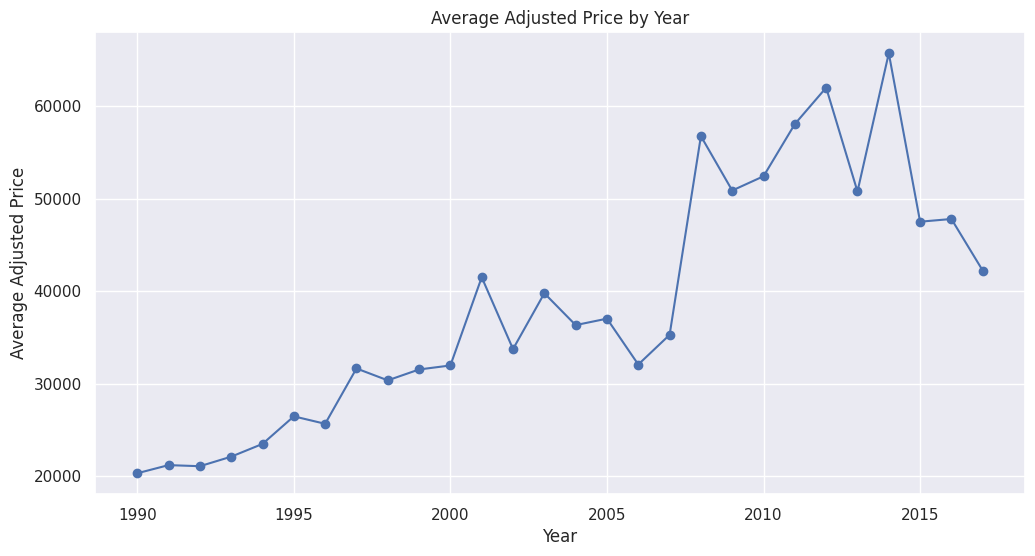

In [17]:
# Plot new prices

yearly_avg_adjusted_price = df.groupby('Year')['adjusted_price'].mean().to_dict()
print(yearly_avg_adjusted_price)
plt.figure(figsize=(12,6))
plt.plot(list(yearly_avg_adjusted_price.keys()),list(yearly_avg_adjusted_price.values()), marker='o')
plt.xlabel('Year')
plt.ylabel('Average Adjusted Price')
plt.title('Average Adjusted Price by Year')
plt.show()

# Plot the relationship between Engine HP and highway MPG

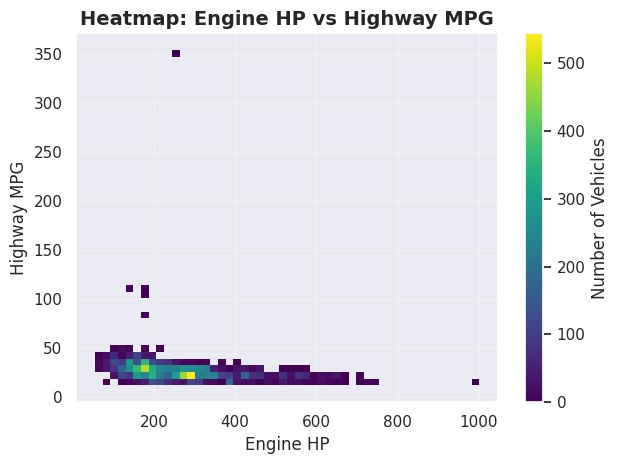

In [18]:
# Plot the relationship between Engine HP and highway MPG
sns.histplot(
    x=df['Engine HP'],
    y=df['highway MPG'],
    bins=50,
    cmap='viridis',
    cbar=True,
    cbar_kws={'label': 'Number of Vehicles'}
)

plt.xlabel('Engine HP', fontsize=12)
plt.ylabel('Highway MPG', fontsize=12)
plt.title('Heatmap: Engine HP vs Highway MPG', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
### IF WE DIDN'T GET TO REMOVING OUTLIERS IN CLASS, THEN YOU CAN SKIP THIS SECTION
# Remove any outliers from Engine HP and highway MPG 


# Replot the relationship between Engine HP and highway MPG


In [20]:
# Re-Plot the relationship between Engine HP and highway MPG


# Make a scatter plot of Engine HP vs highway MPG

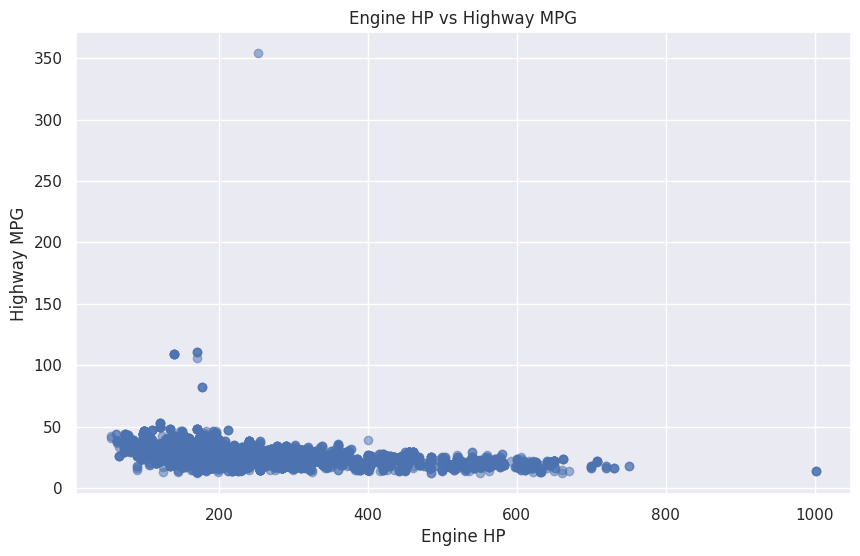

In [21]:
# Make a scatter plot of Engine HP vs highway MPG
engine_hp = df['Engine HP']
highway_mpg = df['highway MPG']
plt.figure(figsize=(10,6))
plt.scatter(engine_hp, highway_mpg, alpha=0.5)
plt.xlabel('Engine HP')
plt.ylabel('Highway MPG')
plt.title('Engine HP vs Highway MPG')
plt.show()


# What does this plot tell you about how Engine HP affects highway MPG?

In [22]:
# What does this plot tell you about how Engine HP affects highway MPG?
correlation = df['Engine HP'].corr(df['highway MPG'])
print(f'Correlation between Engine HP and Highway MPG: {correlation}')


Correlation between Engine HP and Highway MPG: -0.42380892908164813


In [23]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('The plot shows a negative correlation between Engine HP and Highway MPG, indicating that as Engine HP increases, that meeans when the engine power increases, the fuel efficiency decreases.')

The plot shows a negative correlation between Engine HP and Highway MPG, indicating that as Engine HP increases, that meeans when the engine power increases, the fuel efficiency decreases.


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

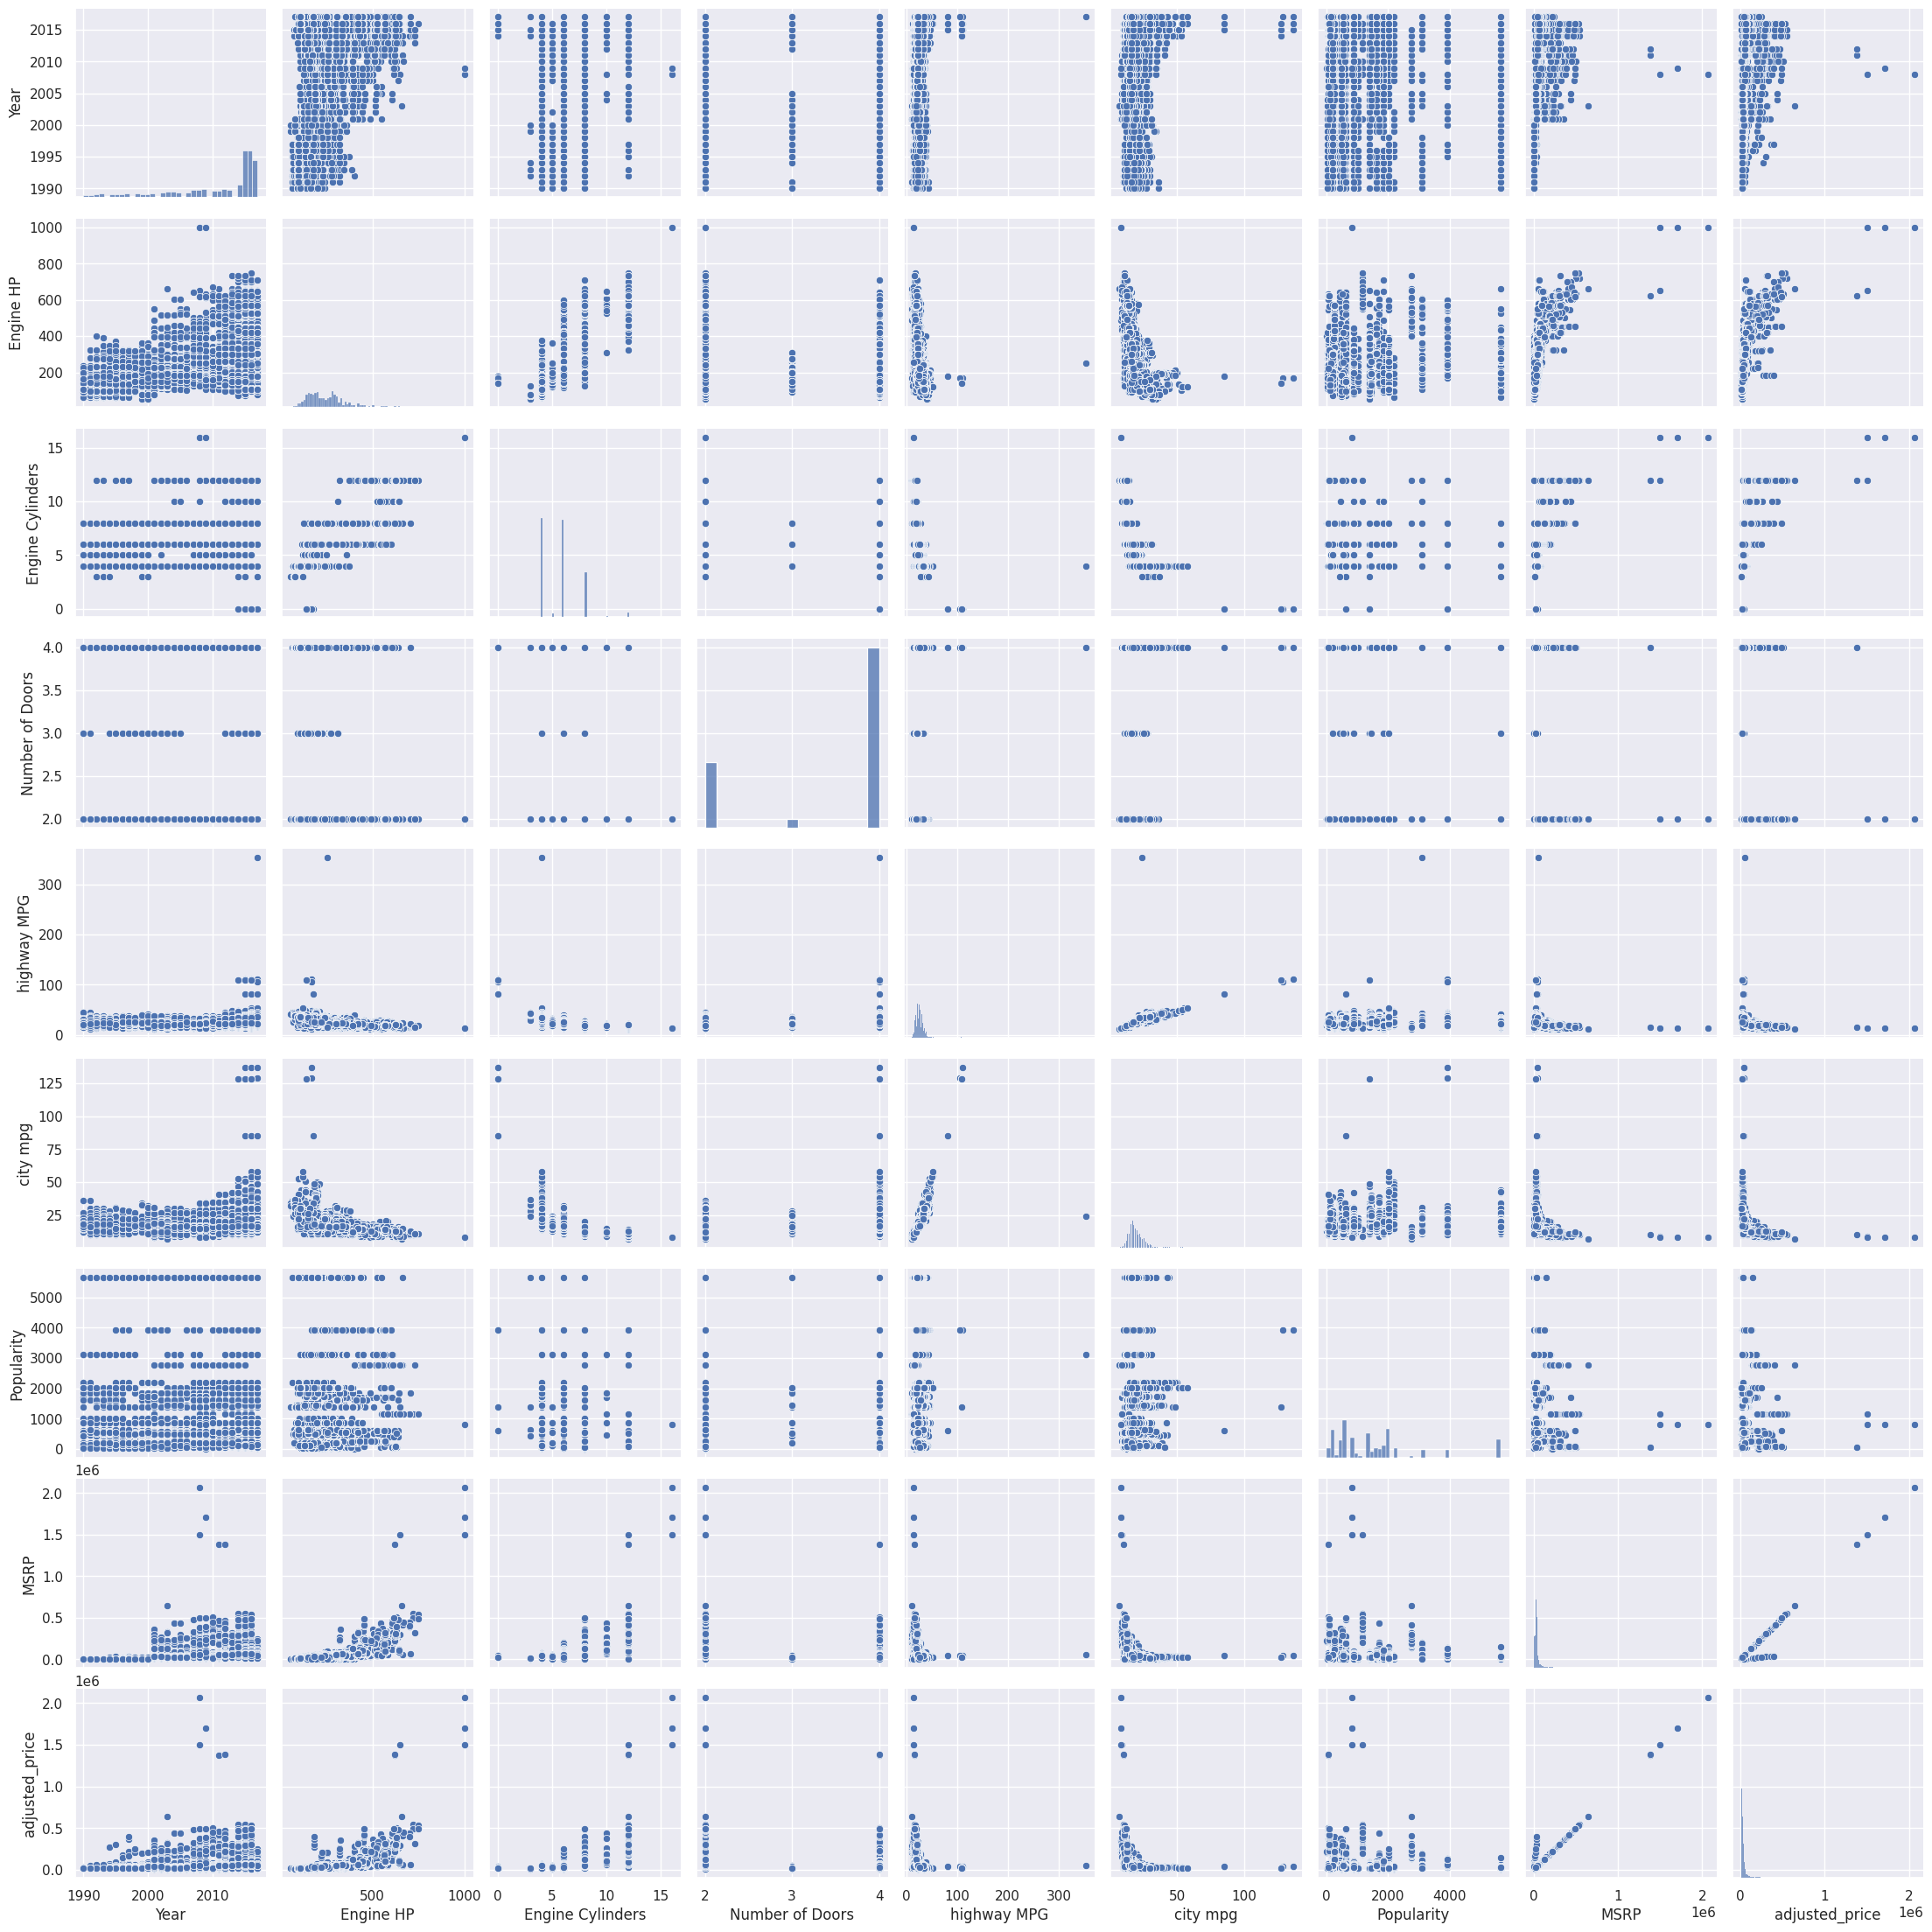

In [24]:
# Using a pairplot, display all of the linear relationship.

sns.pairplot(df)


In [25]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

print("Engine HP vs Engine Cylinders and Highway MPG vs City MPG")

Engine HP vs Engine Cylinders and Highway MPG vs City MPG


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

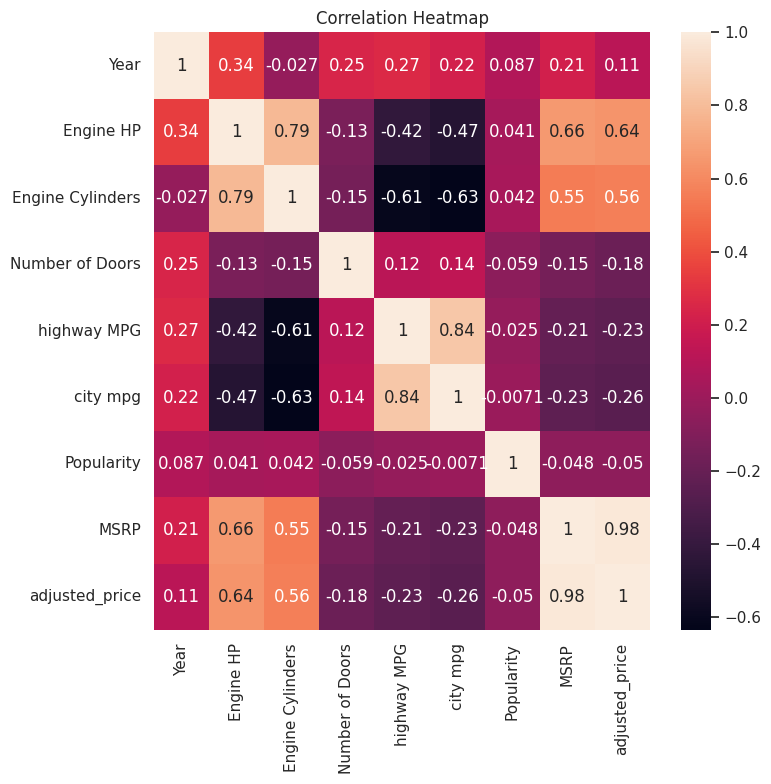

In [26]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [27]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.
print("Engine HP has the strongest relationship with Engine Cylinders (r = 0.79). This exists because more cylinders generally mean more power output, leading to higher horsepower.")


Engine HP has the strongest relationship with Engine Cylinders (r = 0.79). This exists because more cylinders generally mean more power output, leading to higher horsepower.


# [EXTRA CREDIT] 
* (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

* (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

* (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.


* (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

* (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items. 


